<a href="https://colab.research.google.com/github/sonhj110/SESAC_lecture/blob/master/231020_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0_%ED%86%A0%ED%94%BD%EC%B6%94%EC%B6%9C_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 가져오기

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/나의 실습파일/review.csv',
                  sep='\t')
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 텍스트 전처리

In [4]:
# 한글을 제외한 다른 문자 모두 제거

import re
remove_except_ko = re.compile(r'[^가-힣\s]')

def preprocess(text) :
  text = re.sub(remove_except_ko, ' ', text).strip()
  return text

df['document'] = df['document'].map(lambda x : preprocess(x))

In [5]:
df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
! pip install konlpy
from konlpy.tag import Okt

In [7]:
stop_pos = ['Josa', 'Eomi', 'Punctuation', 'Unknown', 'Adverb']
stop_word = ['영화', '정말', '진짜']

tokenizer = Okt()
df['morphs'] = None # 새 열 만들기

for i, row in df.iterrows() : # 인덱스랑 행 둘다 가져오기

  tokens = tokenizer.pos(row['document'])  # 품사 붙이기
  token_ls = []

  for token in tokens :
    if len(token[0]) > 1 :  # 한글자 단어는 걸러내기
      if token[0] not in stop_word :
        if token[1] not in stop_pos :
          token_ls.append(token[0])

  df['morphs'][i] = ' '.join(token_ls)

In [8]:
df.head()

,id,document,label,morphs
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,포스터 보고 초딩 오버 연기 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,무재 밓었 다그 래서 보는것을 추천
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,교도소 이야기 구먼 솔직히 재미 없다 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 익살스런 연기 돋보였던 스파이더맨 늙어 보이기만 했던 커스틴 던스트 이뻐...


# TF-IDF 구해서 키워드 추출


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_keyword(text) :
  tfidf_vect = TfidfVectorizer()
  tfidf_v = tfidf_vect.fit_transform([text])

  keyword = tfidf_v.tocoo()

  sorted_words = sorted(zip(keyword.col, keyword.data), key = lambda x:(x[1], x[0]), reverse=True)
  feature_name = tfidf_vect.get_feature_names_out()  # 단어만 뽑아내기
  keywords = [(feature_name[i], score) for i, score in sorted_words[:5]] # tfidf값이 높은 상위 다섯개 키워드만
  word_ls = []

  for word in keywords :
    word_ls.append(word[0])

  return word_ls

In [10]:
# key=lambda x: (x[1], x[0])
# 정렬 키(key)를 설정하는데, 이 함수는 각 튜플에 대해 정렬을 수행하는 데 사용됩니다.
# 튜플을 받아서 (x[1], x[0])와 같이 새로운 튜플을 생성합니다.
# 이 새로운 튜플은 먼저 x[1] 값에 따라 정렬되고, 동일한 x[1] 값인 경우 x[0] 값에 따라 정렬됩니다.
# 즉, 먼저 두 번째 요소(x[1])에 따라 정렬하고,
# 동일한 두 번째 요소 값인 경우 첫 번째 요소(x[0])에 따라 정렬됩니다.

In [11]:
get_keyword(df['morphs'][59])

['언제', '백봉기', '나오나요']

In [12]:
df['keywords'] = None
for i, row in df.iterrows() :
  # print(i, row)
  # break
  if len(row['morphs']) > 1 : # 만약 리뷰에 불용어밖에 없었으면 빈값이 나오니까
    df['keywords'][i] = ' '.join(get_keyword(row['morphs']))

df.head(5)

,id,document,label,morphs,keywords
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리,짜증나네요 목소리 더빙
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,포스터 보고 초딩 오버 연기 가볍지 않구나,포스터 초딩 오버 연기 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,무재 밓었 다그 래서 보는것을 추천,추천 보는것을 밓었 무재 래서
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,교도소 이야기 구먼 솔직히 재미 없다 평점 조정,평점 조정 재미 이야기 없다
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 익살스런 연기 돋보였던 스파이더맨 늙어 보이기만 했던 커스틴 던스트 이뻐...,했던 커스틴 익살스런 이뻐 연기


In [13]:
df = df.dropna()
pos = df[df['label'] == 1]
neg = df[df['label'] == 0]

In [14]:
total_neg = ''

for i, row in neg.iterrows() :
  total_neg += ' '.join(row['keywords'].split())
  total_neg += ' '

total_neg

'짜증나네요 목소리 더빙 추천 보는것을 밓었 무재 래서 평점 조정 재미 이야기 없다 학년 초등학교 아까 생인 살용 했다 제대로 원작 살려내지못 긴장감 반복 해도 하는 이응경 연기 횡단보도 쳐나 이범수 울면 연기 어거지 감동 취향 존중 스토리 하는데 표절 재미 이해 없어지냐 음식 별로 바베트 만찬 할랫 지루하다 중반 주제 좋은데 짤랐을꺼 없었던거야 납득 꺼야 그럴꺼야 카밀라 발연기 진부하고말 아까워 쓰레기 시간 도안 죄인 입니다 기대했던 일까 했던건 하고자 틱장애 키이라 포스터 있어 보이는데 관객 완전 없고 하나 웃긴거도 없음 낭비 평점 시간 속지 마시길 이민기 공감 파손 툭하면 캐릭터 하더군 이런거 없냐 수준 북한 합니다 우리 사랑 포퐁 진호 저그 작은 세르게이 혼자 했더니 원한 애가 무슨 최고 심심한 카리스마 예측 없는 악역 보는내내 중간 불알 당황 느낌 나와서 평범함 평범한 조금 일상 밋밋한게 한두 짜증 주인공 전개도 전개 캐릭터 중반 재탕 작품 이제 초반 짜리 지루하고 연기력 손예진 뽑는게 박시환 맞냐 망신 노래실력 일본 이런 유치하다 건가 졸작 전개 어이없는 어설픈 결말 했던 항거 폭도 왕조 온몸 실망 매우 갈등 흥행 화해 한국영 평점 시작 사진 불안하더니만 분만 보며 진창 하는지도 엉망 모르겠고 먹고 이건 우뢰매 입니다 쓰레기 였다 별루 최악 성룡 화신 클라라 아닌데 볼라 본거 캐스팅 진심 재미없음 이훨 쓰면 봅니다 고은님 감독 않았고 스토리 무섭지도 했으면 있게 은은하고 억지스럽고 어땠을까 킬링타임 태어나서 처음 중간 불륜 로맨스 했구나 하아 하네 짬뽕 짜증 시간 솔직히 별루더 느낌 낭비 이상해 내용 전개 느리다 내용 흥미 전개 이야기 안되는군 소재 절대 쓰레기 보지마라 허풍 포장 특유 중국인 있어 좋았을텐데 잡는 이건 우상화 설정 별로 일까 아니 연기자 문제 했음 진심 전혀 제대로 욕심 보여줬다면 많았던 빵점 않다 아주 모자라진 하고 믿어지냐 뫼비우스 만들어졌다는게 도둑 케이블 줬으면 나와 하나 차이밍량 짬뽕 이냐리 섞인 없음 하는 질린다 이제 여

In [15]:
total_pos = ''

for i, row in pos.iterrows() :
  total_pos += ' '.join(row['keywords'].split())
  total_pos += ' '

total_pos

'포스터 초딩 오버 연기 않구나 했던 커스틴 익살스런 이뻐 연기 재미 있는 없는데도 액션 안되는 화려함에만 헐리우드 평점 있나 왜케 인피니트 허진호 향수 죽겠다 절제 자극 좋다 자꾸 잊어버린다 이었다는 사람 재밋음 매번 되고 긴장 이기 웃긴게 안달 아이돌 사람 깨알 캐스팅 질퍽 일드 이건 착한 절대 이라 약탈 아닌 학생 절대 있는 아님 심오한 웃지 않는 불가능하다 보면서 평범한 절대 아닌 수작 말씀드립니다 할텐데 털어 버려야 고추 재밋는뎅 향수 탁월한 캐스팅 있는 연출 해준 한번 좋았어요 위력 완전 재밌는데 낮은고 최고 인생 드라마 패션 투어 열정 안나 대한 정신 재미있겠네요 유령 원작 나간 평가 받는지 모르겠다 은은한 매력 단순하면서 오게 서리 두어라 굶주렸다 없네 보는 보고싶은데 방법 들어요 합니다 하게 평점 줄게요 주고 제일 했음 하고 토르 타르 행복했네요 잠시 잊고 있군요 영혼 자체 있을까 시리 드라마 감동 재미있어요 좋아요 하는 하나 충격 차갑고 지독하고 언제 백봉기 나오나요 헤집어놓는 최고 싶게하는 사랑 감정 현대 했으면 합니다 학살 잡기 재밌네 재미있을 비슷한 보신 조작 안이 활짝 하면 하려고하면 재밌었어요 재밋네 달팽이 편이였구 전개 보았습니다 무난 내용 아햏햏 할수있지 최고 단연 최고 진정 위대한 되는 내일 기대 좋아한건 조미 막문위 가요 쓰러짐 부라릴 골깜 이혜리 때리네 되라 걸스데이 이뻐서 서기 주귀 재밌어요 인공 완전 인상 였다 재밌습니다 완전 어내스트 셀레스틴 강추 재미있는 입니다 슬펐던 보면서 차차 재밌음 재밌고 에피소드 스토리 해줘서 하나 카나 작화 였다 잔잔한게 생각 같습니다 하면 크리스마스 떠오르는 행복 재미있게 봤습니다 매력 하던데 있었던 음악 완전히 산만하긴 대박 하는거지 패널 시청률 서운하다 명작 주식회사 재밌게 봤다 몬스터 하다 주인공 전부 생애 삶속 가자 지난 재미있었음 본지 남기지만 다시 지나 연기 순수한 숀펜 잘써놨네 아주 베댓 찌릿 짜릿 용기 온몸 가져야지 화이 재미있고 교훈 주제 주입 전하 재밌게 작품 좋구나 정도

In [18]:
from collections import Counter

result_neg = Counter(total_neg.split())
result_pos = Counter(total_pos.split())

In [19]:
word = []
count = []

for x in result_neg :
  word.append(x)
  count.append(result_neg[x])

set_neg = dict(zip(word, count))
print(len(set_neg))

7687


In [20]:
word = []
count = []

for x in result_pos :
  word.append(x)
  count.append(result_pos[x])

set_pos = dict(zip(word, count))
print(len(set_pos))

7224


In [21]:
!pip install wordcloud
# 한글 폰트 설정
!sudo apt-get install y-fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package y-fonts-nanum
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cac

In [22]:
# 폰트 경로 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

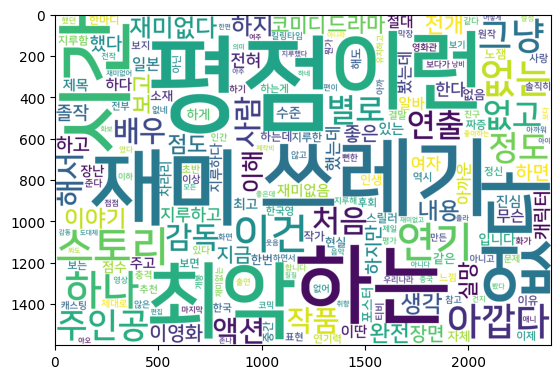

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'

wc = WordCloud(font_path = font_path,
               width = 1200,
               height = 800,
               scale = 2.0,
               max_font_size = 250,
               background_color = 'white')
gen = wc.generate_from_frequencies(result_neg)
plt.figure()
plt.imshow(gen)

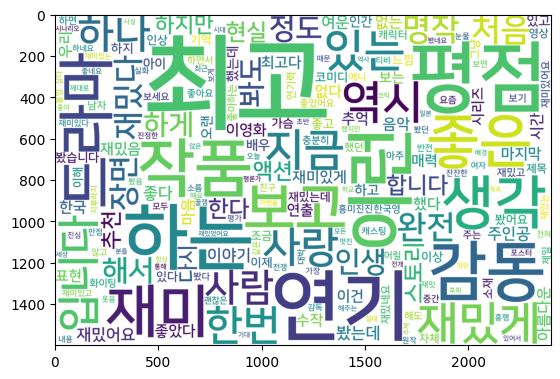

In [24]:
wc = WordCloud(font_path = font_path,
               width = 1200,
               height = 800,
               scale = 2.0,
               max_font_size = 250,
               background_color = 'white')
gen = wc.generate_from_frequencies(result_pos)
plt.figure()
plt.imshow(gen)